# Graph Coloring with `networkx`

This tutorial mainly follows this medium [article](https://towardsdatascience.com/graph-coloring-with-networkx-88c45f09b8f4).

# Prerequisites

- Python 3
- `pip install networkx`

# Table of Contents
1. Networks in Python with library networkx
2. Graph coloring problem
3. Solve practical example

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt

# Networks in Python
A network is made up from nodes and edges which are the connections between the nodes. 

In [2]:
import networkx as nx
network = nx.Graph()

In [3]:
network.add_nodes_from([1,2,3])
print(f"This network has now {network.number_of_nodes()} nodes.")

This network has now 3 nodes.


In [4]:
network.add_edge(1,2)
network.add_edge(1,3)

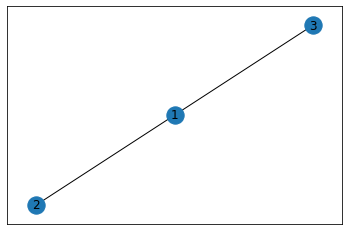

In [5]:
nx.draw_networkx(network, with_labels=True)

# Graph Coloring Problem
The Graph Coloring Porblem is defined as:

> Given a graph G and k colors, assign a color to each node so that adjacent nodes get different colors.

In [6]:
network.add_nodes_from([4,5,6,7])

network.add_edge(1,4)
network.add_edge(1,5)
network.add_edge(2,4)
network.add_edge(3,5)
network.add_edge(5,6)
network.add_edge(7,3)
network.add_edge(7,6)

You can color the graph manually.

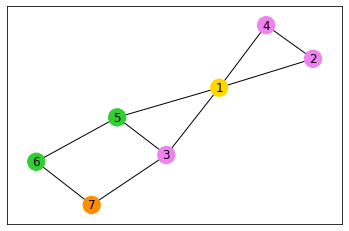

In [7]:
color_list = ["gold", "violet", "violet", "violet", 
              "limegreen", "limegreen", "darkorange"]

nx.draw_networkx(network, node_color=color_list, with_labels=True)

We have to fix the coloring so that adjacent nodes do not have the same color. 
- Node 2 and 4 have the same color but are adjacent.
- Node 5 and 6 have the same color but are adjacent.

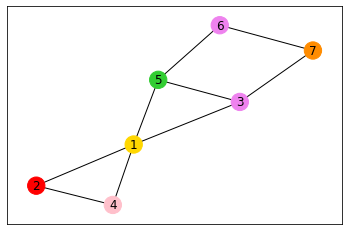

In [8]:
color_list = ["gold", "red", "violet", "pink", "limegreen", "violet", "darkorange"]
nx.draw_networkx(network, node_color=color_list, with_labels=True)

# Practical Example

In this example, we try to find an optimal solution for the exam schedule of a single semester. The artifical dataset consists of 250 students which attend a fictitious school that offers 5 majors that also can be attended as minors. Each student is allowed to register for 5 classes. If she or he enrolled for a combination of a minor and a major (which is done by 10% of the students) then she or he takes 3 classes from the major and 2 from the minor. If they study only a major, they choose all 5 lectures from their main subjects. Each subject offers between 6 and 9 classes.

> NOTE: variables associated with school classes are named `courses` in code since `class` is a reserved keyword in Python.

Data source: https://www.kaggle.com/yvesboutellier/synthetic-school-enrollment-data

In [9]:
import pandas as pd

student_data = pd.read_csv("../data/synthetic_school_enrollment_data.csv", index_col=0)
student_data.head()

,Major,Minor,Biology of the Cell,Molecular Biology,Evolution,Biochemistry,Neurobiology,Animal Behavior,Genetics,Bioinformatics,...,Numerical Methods,Data Science,Machine Learning,Artificial Inteligence,Ecology,Chemical Geology,Physical Geology,Glaciology,Tectonics,Weather Systems
Vanessa Harris,Computer Science,NaN,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
James Toliver,Computer Science,NaN,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
Carol Tyer,Computer Science,NaN,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
Brooke Masters,Computer Science,NaN,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
Maria Cope,Math,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We want to prevent adjacent (neighboring) nodes from having the same color. In this example, we want to make sure that students do not take two exams at the same time. 

The network model will have courses as nodes and exam dates as colors. The nodes (classes) are connected if they share participating students. Therefore, our exam scheduling is solved when no neighboring classes/nodes have the same date/color.

In [10]:
courses = list(student_data.columns)[2:]  # 40 classes

In [11]:
class_network = nx.Graph()
class_network.add_nodes_from(courses)

An edge is drawn between two classes if class A shares at least one student with class B.

Each student attends 5 courses. We want to pack them into a list so that we can later make edges between all the possible combinations in this list since this one student cannt attend any of these 5 exams at the same time. Therefore, we loop over the students and make a list of classes for each student.

In [12]:
without_subj = student_data.drop(["Major", "Minor"], axis=1)
without_subj = without_subj.T
without_subj.head()

,Vanessa Harris,James Toliver,Carol Tyer,Brooke Masters,Maria Cope,Harold Ray,Dorothy Sadler,Allen Previte,William Evens,Gina Lewis,...,John Fulton,Mary Martinez,David Lester,Christopher Weimer,William Leab,Peter Moran,Minerva Evans,Larry Unga,Christine Lee,Bonita Senay
Biology of the Cell,False,False,False,False,False,True,False,True,False,False,...,True,True,True,False,False,False,True,False,False,False
Molecular Biology,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,True,False,False,False,False,False
Evolution,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
Biochemistry,False,False,False,False,False,True,False,True,False,False,...,True,True,True,False,False,False,True,False,False,False
Neurobiology,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [13]:
list_of_names = student_data.index
list_of_overlaps = []

for student in list_of_names:
    list_of_overlaps.append(list(without_subj.loc[without_subj[student]].index))

print(list_of_overlaps[:5])

[['Software Engineering', 'Programming in C++', 'Data Science', 'Machine Learning', 'Artificial Inteligence'], ['Programming Introduction', 'Programming in C++', 'Data Science', 'Machine Learning', 'Artificial Inteligence'], ['Programming Introduction', 'Algorithms', 'Programming in C++', 'Data Science', 'Machine Learning'], ['Programming Introduction', 'Algorithms', 'Programming in C++', 'Numerical Methods', 'Artificial Inteligence'], ['Calculus I', 'Probability I', 'Statistics I', 'Linear Algebra', 'Programming for Mathematics']]


Loop over the list of overlaps that were created for each student and then combine every course with every other course of this list. This enables us to take the paris and form edges between them. 

In [14]:
import itertools

for sublist in list_of_overlaps:
    for pair in itertools.combinations(sublist, 2):
        class_network.add_edge(pair[0], pair[1])

In [15]:
n_edges_total = len(list(class_network.edges))
print(n_edges_total)

273


The formula that describes how many connections or edges are possible for one single graph is:

$$n_{edges\ possible} = \frac{n_{nodes}(n_{nodes}-1)}{2}$$

There are 780 possible edges in this graph.

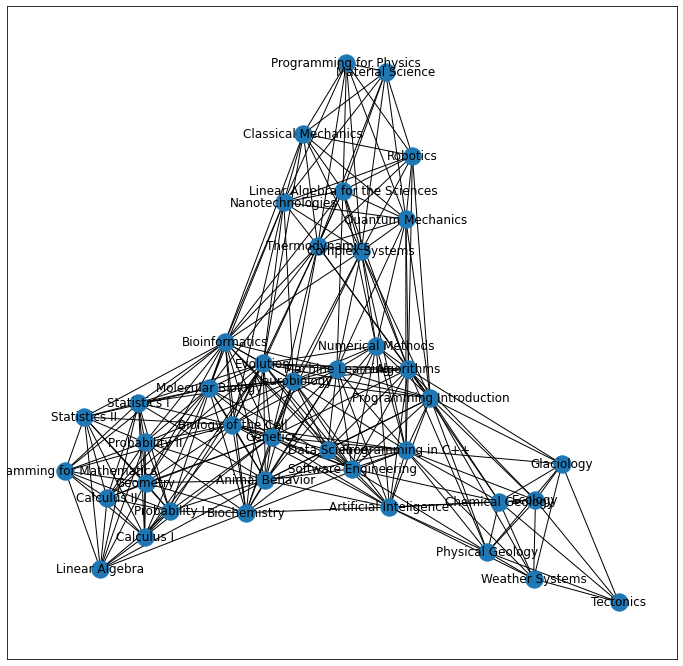

In [16]:
plt.figure(figsize=(12, 12))
nx.draw_networkx(class_network, with_labels=True)

Before we try to find a solution, let's first check how many degrees our network has by calling `network.degree` and this can be converted into a dictionary, and we take the max. The node degree is the number of edges adjacent to the node.

In [17]:
max(dict(class_network.degree).values())

21

We have a total of 40 classes. To be on the safe side, let's prepare 24 possible colors and exam dates to which we can assign class exams and a dictionary that translates from colors to datetime objects. Let's assume each exam takes 1.5 hours and students get a 30-minute break after the exam (total of 2 hours between exams).

In [18]:
colors = list(range(0, 24))
dates = []
calendar = {}

for i in list(range(14, 20)):
    for j in list(range(10,18,2)):
        date = datetime(2021, 6, i, j, 0)
        dates.append(date)
        calendar[date] = []

Our translating dictionary:

In [19]:
from_color_to_date = {color: dates[i] for i, color in enumerate(colors)}

Now we will try different coloring strategies to try to find the best solution to this problem. You can refer this medium [article](https://towardsdatascience.com/graph-coloring-with-networkx-88c45f09b8f4) if you want to write your own greedy algorithm to color a graph. In this tutorial, we will be using a builtin function from `networkx` to color this graph. 

This problem is a NP-complete-problem, meaning the solution can only be found with brute-force algorithms. Since it is a NP-complete-problem, we cannot get better than the greedy algorithm. 

> A **greedy algorithm** is a simple, intuitive glorithm that is used in optimization problems. The algorithm makes the optimal choice at each step as it attempts to find the overall optimal way to solve the entire problem. 

We can use [`networkx.algorithms.coloring.greedy_color`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.coloring.greedy_color.html#r3570b859f9f4-3) function to color a graph using various strategies of greedy graph coloring. The given strategy determines the order in which nodes are colored.

The function returns **a dictionary with keys representing nodes and values representing corresponding coloring.**

In [20]:
coloring = nx.algorithms.coloring.greedy_color(class_network, strategy="largest_first")
pd.DataFrame.from_dict(coloring, orient="index", columns=["color"])

,color
Bioinformatics,0
Biology of the Cell,1
Evolution,2
Neurobiology,3
Animal Behavior,4
Programming Introduction,0
Algorithms,1
Programming in C++,2
Genetics,5
Molecular Biology,6


Checking how many colors or dates we need.

In [21]:
len(set(coloring.values()))

10

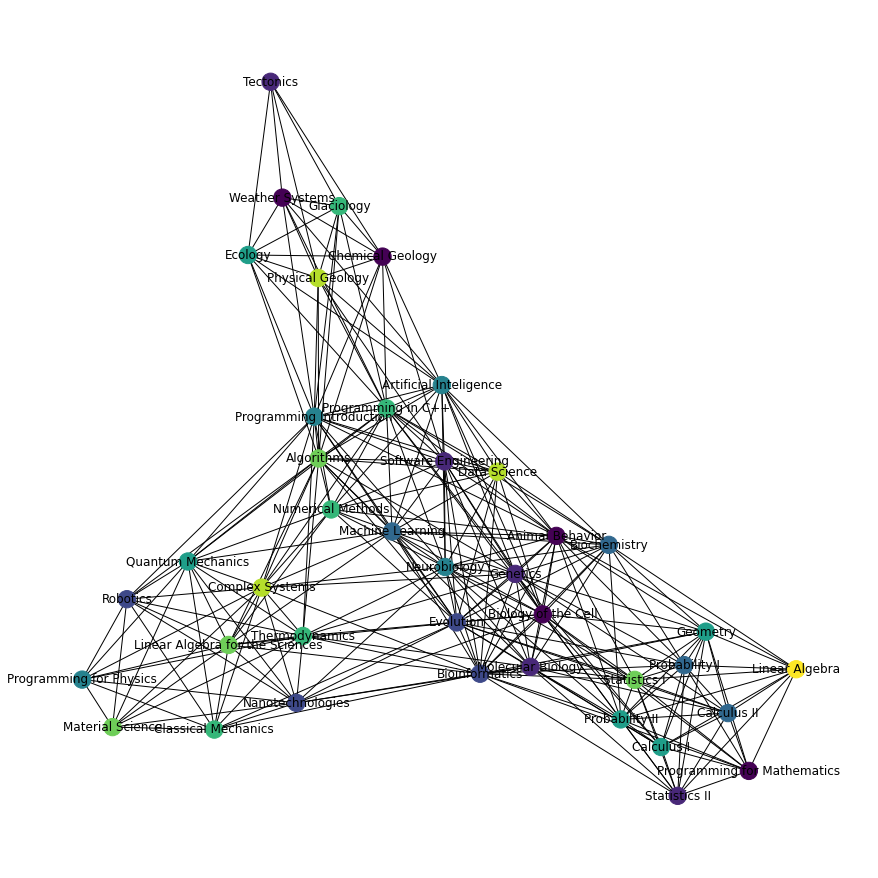

In [22]:
fig = plt.figure(figsize=(12, 12))
nx.draw(class_network, node_color=list(coloring.values()), with_labels=True)

Let's check if using a different strategy can reduce the number of colors.

In [23]:
coloring_nums = []
best_coloring = {}

strategies = [
    "saturation_largest_first",
    "largest_first",
    "random_sequential",
    "independent_set",
    "connected_sequential_bfs",
    "connected_sequential_dfs"
]

for strategy in strategies:
    coloring = nx.algorithms.coloring.greedy_color(class_network, strategy=strategy)
    coloring_num = len(set(coloring.values()))        
    coloring_nums.append(coloring_num)

    if best_coloring == {}:
        best_coloring = coloring
    elif max(coloring.values()) < max(best_coloring.values()):
        best_coloring = coloring

pd.DataFrame.from_dict(
    {strategy:num for strategy, num in zip(strategies, coloring_nums)},
    orient="index",
    columns=["num_colors"]
    )

,num_colors
saturation_largest_first,9
largest_first,10
random_sequential,10
independent_set,10
connected_sequential_bfs,11
connected_sequential_dfs,11


We see that using a different strategy can increase or decrease the number of colors used in the graph. In this example, "saturation_largest_first" strategy resulted in the lowest number of colors.

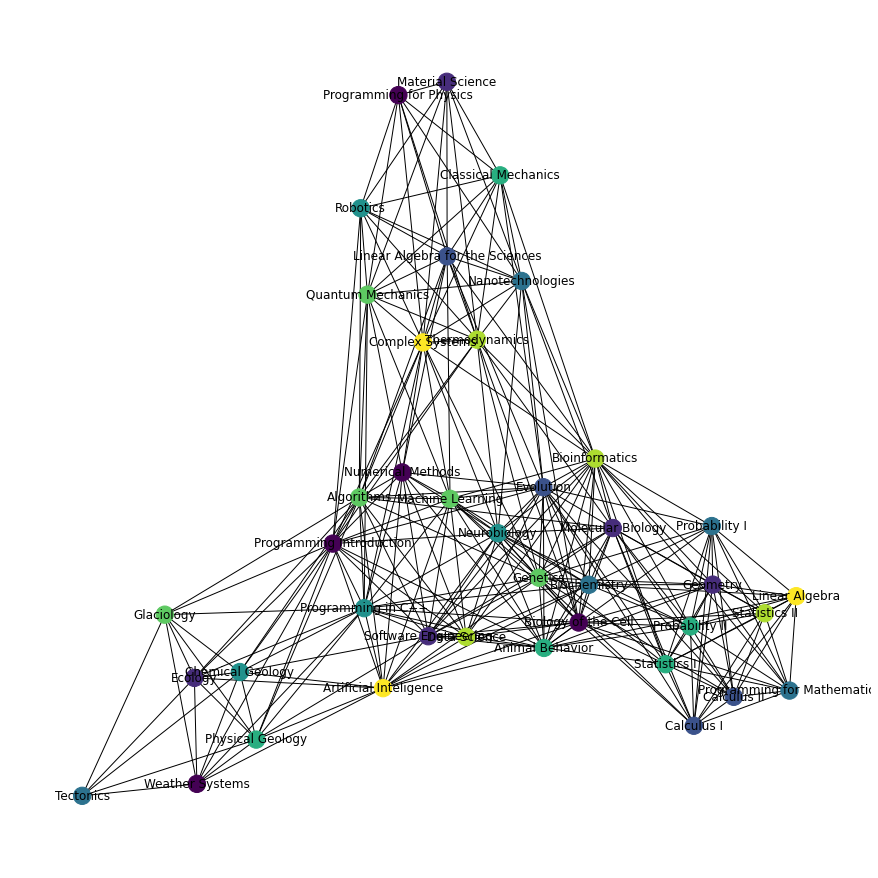

In [24]:
plt.figure(figsize=(12, 12))
nx.draw(class_network, node_color=list(best_coloring.values()), with_labels=True)

Finally, let's create the exam schedule.

In [25]:
for k, v in best_coloring.items():
    calendar[from_color_to_date[v]].append(k)

In [26]:
max_number_exams_sync = len(max(list(calendar.values()), key=len))
rooms = ["Room " + str(i+1) for i in list(range(max_number_exams_sync))]
schedule = pd.DataFrame.from_dict(calendar, orient="index", columns=rooms)
schedule = schedule.dropna(axis=0, how="all", subset=rooms)

schedule

,Room 1,Room 2,Room 3,Room 4,Room 5
2021-06-14 10:00:00,Bioinformatics,Programming Introduction,Programming for Physics,Calculus I,Tectonics
2021-06-14 12:00:00,Biology of the Cell,Numerical Methods,Robotics,Probability I,Chemical Geology
2021-06-14 14:00:00,Evolution,Programming in C++,Thermodynamics,Probability II,None
2021-06-14 16:00:00,Neurobiology,Algorithms,Geometry,Classical Mechanics,Weather Systems
2021-06-15 10:00:00,Animal Behavior,Complex Systems,Statistics II,Physical Geology,None
2021-06-15 12:00:00,Genetics,Data Science,Statistics I,Quantum Mechanics,Ecology
2021-06-15 14:00:00,Molecular Biology,Machine Learning,Material Science,Linear Algebra,Glaciology
2021-06-15 16:00:00,Software Engineering,Biochemistry,Linear Algebra for the Sciences,Calculus II,None
2021-06-16 10:00:00,Artificial Inteligence,Nanotechnologies,Programming for Mathematics,None,None


Sanity check.

In [27]:
for i in range(len(schedule)):
    sametime_courses = schedule.iloc[i].values
    print([best_coloring[course] for course in sametime_courses if course in best_coloring.keys()])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4]
[5, 5, 5, 5, 5]
[6, 6, 6, 6, 6]
[7, 7, 7, 7]
[8, 8, 8]
